<!-- <img src="./logo_UTN.svg" align="right" width="150" />  -->
<img src="Logo_UNSAM.png" align="right" width="150" />  -->
#### Análisis y Procesamiento Digital de Señales

# Tarea Semanal N°02
#### Montserrat Coto



## Introducción  

En este trabajo práctico, analizaremos dos filtros con el objetivo de hallar su función de transferencia:  

$$ H(s) = \frac{V_o(s)}{V_i(s)} $$

Posteriormente, se calculará y graficará su respuesta en magnitud y fase, destacando la respuesta asintótica donde corresponda. Además, se identificará el tipo de filtro y se calculará su ancho de banda.  

El propósito de este ejercicio es familiarizarnos con los distintos tipos de filtros utilizados en el análisis y procesamiento de señales. A través del uso de Python, representaremos gráficamente la respuesta de los filtros y visualizaremos su comportamiento mediante mapas de polos y ceros. Este enfoque facilita la comprensión de sus características sin recurrir exclusivamente a métodos analíticos.  

Para ello, se realizó inicialmente el cálculo analítico de las funciones de transferencia y sus respectivos módulos, lo que permitió obtener el ancho de banda teórico, dado que no se cuentan con valores específicos de los elementos del circuito, el ancho de banda fue expresado de manera teórica. Luego, se utilizo Python para graficar las respuestas en módulo y fase, así como para generar el mapa de polos y ceros. Estas visualizaciones brindan una perspectiva de la respuesta asintótica y permiten identificar su comportamiento asintotico.  

Por último, se determinó el tipo de filtro considerando las condiciones límite de  $w$  (cuando tiende a 0 o a ∞) y analizando el comportamiento de los circuitos.


# Desarollo

## 1. Función de transferencia H(s)

Función de transferencia del Filtro A: 

$$ H(s) = \frac{s(\frac{\omega_0}{Q})}{s^2 + s(\frac{\omega_0}{Q}) + \omega_0^2} $$

Función de transferencia del Filtro B: 

$$ H(s) = \frac{s^2}{s^2 + s \frac{\omega_0}{Q} + \omega_0^2} $$


En el archivo PDF adjunto se encuentran detalladas ambas funciones de transferencia obtenidas analíticamente, que servirán como base para el posterior análisis gráfico y numérico.

In [8]:
from IPython.display import IFrame
IFrame("1. Función transferencia.pdf", width=1000, height=1000)

## 2. Calcular y graficar la respuesta de módulo y fase. Indicar la respuesta asintótica donde corresponda.

### 2. 1 Filtro "a"

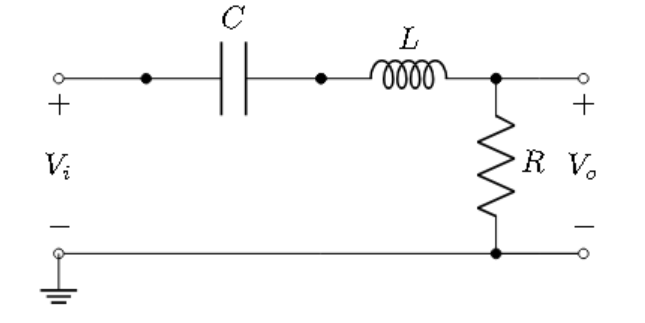

In [14]:
from IPython.display import Image
Image("Filtro A.PNG", width=500, height=300)


#### Cálculo del Módulo de la Respuesta en Frecuencia

Para determinar el módulo de la respuesta en frecuencia del filtro, se realiza la sustitución \( $s$=$jw$) en la función de transferencia. Luego, se aplica el valor absoluto para obtener el módulo de la respuesta.

Módulo de respuesta en frecuencia del Filtro A: 

$$ |H(s)| = \frac{\omega \cdot \omega_0 / Q}{\sqrt{(\omega_0^2 - \omega^2)^2 + (\omega \cdot \omega_0 / Q)^2}} $$

Se adjunta el PDF con el desarrollo completo del cálculo:

In [34]:
from IPython.display import IFrame
IFrame("1. Módulo de la función transferencia. Filtro A.pdf", width=1000, height=400)

#### Gráficos de la respuesta de módulo, respuesta asintótica y fase

##### Definición de Parámetros

In [23]:
# Importación de las ibrerías de jupyter

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig

Dado que la consigna no especifica valores para la frecuencia de corte ni el factor de calidad, elegí $w_0 = 1$ para normalizar la frecuencia de corte a 1 rad/s, lo que facilita los cálculos y permite una comparación más sencilla. De manera similar, seleccioné $Q = 1$ para garantizar que los polos del filtro se ubiquen sobre la circunferencia unitaria. Con estos dos valores, es posible determinar la ubicación de los polos y ceros en el mapa.

In [24]:
Q = 1 
w0 = 1

Una vez obtenida la función de transferencia y su módulo, la respuesta en magnitud y fase se calculó y graficó mediante simulación, aprovechando las herramientas de cálculo que ofrecen los módulos Numpy y SciPy. Además, se representó el mapa de ceros y polos para visualizar de manera más clara el comportamiento asintótico del sistema.

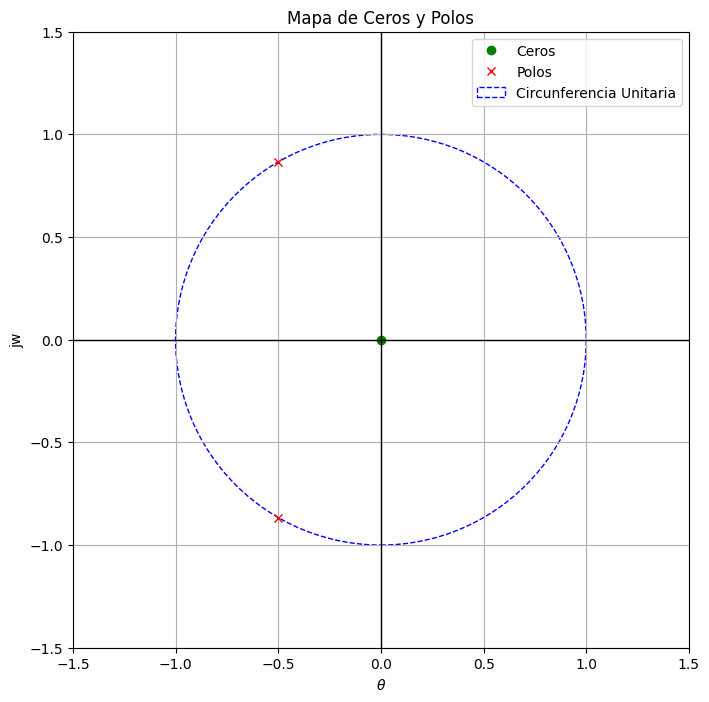

In [26]:
# Coeficientes del numerador y denominador de la función de transferencia 
#Filtro pasa banda
num = np.array([ w0 / Q, 0 ])
den = np.array([ 1., w0 / Q, w0**2 ])

# Función de transferencia
H1 = sig.TransferFunction(num, den)

# Respuesta en magnitud y fase (Bode plot)
frec = np.logspace(-2, 2, 200)  # Frecuencias en rad/s. 
#Especifico las frecuencias a evaluar para alinear el gráfico
w, mag, phase = sig.bode(H1,frec)


# Mapa de ceros y polos
zeros, poles, _ = sig.tf2zpk(num, den)
plt.figure(figsize=(8, 8))  # Tamaño de la figura
plt.plot(np.real(zeros), np.imag(zeros), 'go', label="Ceros")  # Ceros en verde
plt.plot(np.real(poles), np.imag(poles), 'rx', label="Polos")  # Polos en rojo
plt.xlim(-1.5, 1.5) # Los límites de los ejes para asegurarnos de ver la circunferencia
plt.ylim(-1.5, 1.5)
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', label="Circunferencia Unitaria") # Ddistribución circular
plt.gca().add_artist(circle)
# Título y etiquetas
plt.title("Mapa de Ceros y Polos")
plt.xlabel(r'$\theta$')
plt.ylabel("jw")
plt.grid(True)
# Líneas horizontales y verticales en 0
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
# Leyenda
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')  # Asegura que la relación de aspecto sea 1:1
plt.show()

En el gráfico de polos y ceros, podemos observar un **cero** ubicado en el origen (0,0) y dos **polos complejos conjugados** situados sobre la circunferencia unitaria. La presencia del cero en el origen indica que la respuesta del filtro tiene una ganancia nula a frecuencia cero.

Por otro lado, los polos complejos conjugados sobre la circunferencia unitaria son el resultado de mi elección de parámetros. En este caso, con un $Q = 1$, el sistema es marginalmente estable, lo que implica que, bajo ciertas condiciones (como pequeñas variaciones en los componentes del circuito), el filtro podría oscilar. Si el valor de $Q$ fuera menor a 1, el sistema sería estable.

Además, la distancia de los polos al eje imaginario está relacionada con el factor de calidad (Q) del filtro, que determina el ancho de banda y la selectividad del filtro.

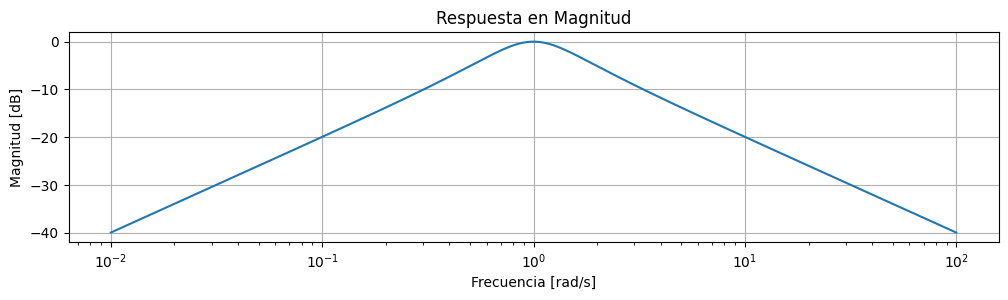

In [27]:
# Gráfico de la respuesta en magnitud (en dB)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.semilogx(w, mag) #crea un gráfico con una escala logarítmica en el eje x y una escala lineal en el eje y.
plt.title("Respuesta en Magnitud")
plt.xlabel("Frecuencia [rad/s]")
plt.ylabel("Magnitud [dB]")
plt.grid(True)



En el gráfico de magnitud, se observa una forma de "campana" centrada en 1 rad/s (10⁰ en la escala logarítmica), lo que indica que se trata de un filtro pasa banda. Este filtro permite el paso de señales en una banda de frecuencias alrededor de 1 rad/s y atenúa las señales fuera de esta banda.

La ganancia máxima es de 0 dB, lo cual es consistente con la elección de $\omega_0=2\pi\times 1$ Hz, lo que significa que la señal se transmite sin amplificación ni atenuación en la frecuencia central. La forma simétrica de la campana refleja que el filtro atenúa tanto las frecuencias bajas como las altas, mientras que permite el paso de las frecuencia medias. Es una forma rápida de identificar un filtro pasa banda, por si no lo hemos visto previamente mediante su comportamiento en el mapa de ceros y polos.

En un filtro pasa banda de segundo orden ideal, se espera una caída de la ganancia de ±20 dB/década en las bandas de atenuación, lo que indica que la ganancia disminuye en 20 dB por cada factor de 10 en la frecuencia fuera de la banda de paso. Esta caída puede ser más suave o más abrupta dependiendo del valor del factor de calidad $Q$.

En este caso, si tomo dos puntos, por ejemplo 1 rad/s y 10 rad/s, veo que la magnitud pasa de 0 dB a aproximadamente -20 dB, lo que indica una pendiente de -20 dB/década en la banda de atenuación de altas frecuencias. De manera similar, se puede observar una pendiente de +20 dB/década en la banda de atenuación de bajas frecuencias. Por lo tanto, se puede concluir que las asíntotas del filtro tienen pendientes de ±20 dB/década, como se esperaba para un filtro pasa banda de segundo orden ideal.

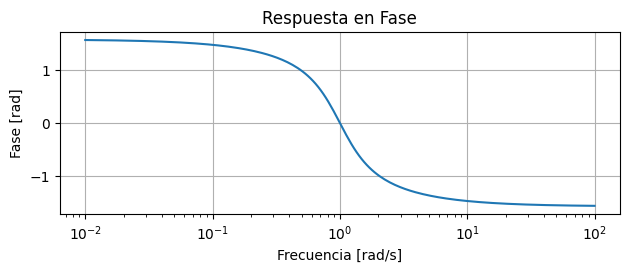

In [28]:
# Gráfico de la respuesta en fase (en radianes)
plt.subplot(2, 1, 2)
plt.semilogx(w, np.deg2rad(phase)) # Conversión de la fase de grados a radianes
plt.title("Respuesta en Fase")
plt.xlabel("Frecuencia [rad/s]")
plt.ylabel("Fase [rad]")
plt.grid(True)

plt.tight_layout() #Ajuste de los margenes
plt.show()

En el gráfico de fase, podemos observar un cambio de fase que va desde +π/2 hasta -π/2. Este comportamiento también se refleja en el mapa de polos, donde los polos complejos conjugados se encuentran sobre el eje imaginario en el plano \(s\). La posición de estos polos determina cómo varía la fase a medida que cambiamos las frecuencias.

Como vimos en clase, el aporte de +π/2 y -π/2 se puede entender al analizar el comportamiento del filtro cuando $w = 0$ y $w\to\infty$ a lo largo del jw. Es por esto que, a frecuencias bajas, la fase comienza en +π/2. A medida que la frecuencia se acerca a la frecuencia central (1 rad/s), la fase disminuye hasta llegar a 0°. Finalmente, a frecuencias altas, la fase se aproxima a -π/2.

La fase total de la función de transferencia es la suma de la fase de la función transferencia en sí misma y la fase de cada polo individual. Esto implica que, al analizar la fase global, debemos tener en cuenta tanto la contribución de los polos (cada uno con su propia fase) como la fase intrínseca de la función de transferencia. Recordemos que estamos trabajando con números complejos, y que cada singularidad (ya sean polos o ceros) tiene asociada una fase. En resumen, la fase total es: $$\text{fase total} = \angle H(s) + \angle \text{polo}_1 + \angle \text{polo}_2 $$

## 2. 2 Filtro "b"

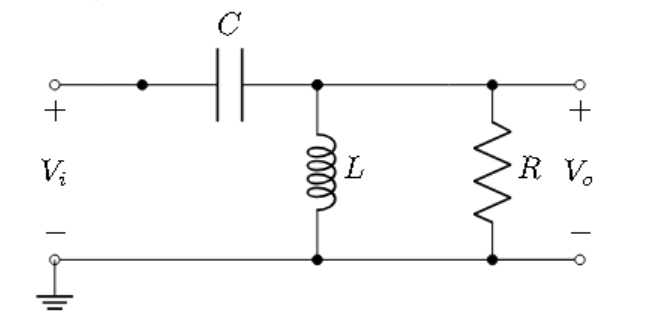

In [29]:
from IPython.display import Image
Image("Filtro B.PNG", width=500, height=300)


#### Cálculo del Módulo de la Respuesta en Frecuencia

Para determinar el módulo de la respuesta en frecuencia del filtro, se realiza la sustitución \( $s$=$jw$) en la función de transferencia. Luego, se aplica el valor absoluto para obtener el módulo de la respuesta.

Módulo de respuesta en frecuencia del Filtro B: 

$$ |H(s)| = \frac{\omega^2}{\sqrt{(\omega_0^2 - \omega^2)^2 + (\omega \cdot \omega_0 / Q)^2}} $$


Se adjunta el PDF con el desarrollo completo del cálculo:

In [33]:
from IPython.display import IFrame
IFrame("1. Módulo de la función transferencia. Filtro B.pdf", width=1000, height=400)

#### Gráficos de la respuesta de módulo, respuesta asintótica y fase

En este caso, vamos a seguir utilizando los mismos parámetros iniciales que para el filtro pasa banda, es decir, definimos $w_0 = 1$ y $Q = 1$. El código es prácticamente el mismo que en el caso anterior, pero con la diferencia de que ahora vamos a variar la función de transferencia para que corresponda al circuito que estamos analizando.

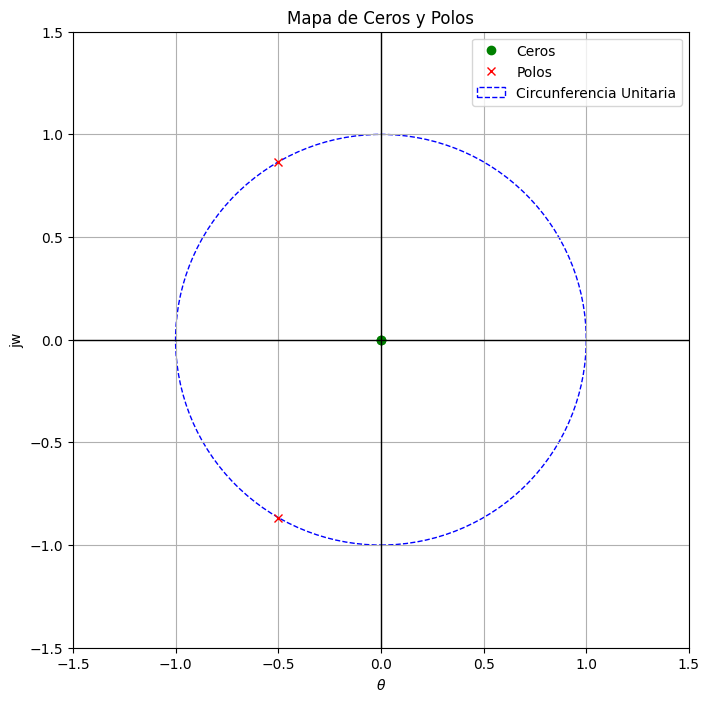

In [36]:
# Coeficientes del numerador y denominador de la función de transferencia 
#Filtro pasa alto
num = np.array([ 1,0,0])
den = np.array([ 1., w0 / Q, w0**2 ])

# Función de transferencia
H1 = sig.TransferFunction(num, den)

# Respuesta en magnitud y fase (Bode plot)
frec = np.logspace(-2, 2, 200)  # Frecuencias en rad/s. 
#Especifico las frecuencias a evaluar para alinear el gráfico
w, mag, phase = sig.bode(H1,frec)

# Mapa de ceros y polos
zeros, poles, _ = sig.tf2zpk(num, den)
plt.figure(figsize=(8, 8))  # Tamaño de la figura
plt.plot(np.real(zeros), np.imag(zeros), 'go', label="Ceros")  # Ceros en verde
plt.plot(np.real(poles), np.imag(poles), 'rx', label="Polos")  # Polos en rojo
plt.xlim(-1.5, 1.5) # Los límites de los ejes para asegurarnos de ver la circunferencia
plt.ylim(-1.5, 1.5)
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', label="Circunferencia Unitaria") # Ddistribución circular
plt.gca().add_artist(circle)
# Título y etiquetas
plt.title("Mapa de Ceros y Polos")
plt.xlabel(r'$\theta$')
plt.ylabel("jw")
plt.grid(True)
# Líneas horizontales y verticales en 0
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
# Leyenda
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')  # Asegura que la relación de aspecto sea 1:1
plt.show()

En el gráfico de polos y ceros de un filtro pasa altos de segundo orden, se observa un **cero** en el origen (0,0) y dos **polos complejos conjugados** ubicados sobre el eje negativo del plano \( s \), simétricamente con respecto al eje imaginario. Los polos se encuentran sobre la circunferencia, porque para el gráfico prefini el valor $Q=1$

El cero en el origen nos indica que el filtro tiene una ganancia nula a frecuencia cero, lo que nos permite pensar que se trata de filtro pasa altos, ya que atenúa las señales de baja frecuencia. Nuevamente, al igual que en el caso del pasa banda, los polos complejos conjugados determinan cómo se comporta el filtro a medida que la frecuencia cambia.


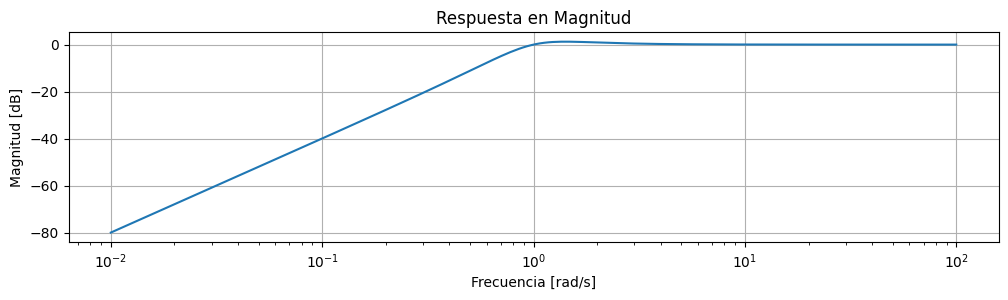

In [37]:
# Gráfico de la respuesta en magnitud (en dB)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.semilogx(w, mag) #crea un gráfico con una escala logarítmica en el eje x y una escala lineal en el eje y.
plt.title("Respuesta en Magnitud")
plt.xlabel("Frecuencia [rad/s]")
plt.ylabel("Magnitud [dB]")
plt.grid(True)


El gráfico muestra una atenuación significativa a bajas frecuencias (por debajo de 1 rad/s) y una ganancia estable de 0 dB a altas frecuencias (por encima de 1 rad/s), lo que es característico de un filtro pasa altos.

A bajas frecuencias, la ganancia disminuye rápidamente, lo que indica que el filtro atenúa esa señales. A medida que la frecuencia aumenta, la ganancia se estabiliza en 0 dB, lo que significa que el filtro comienza a permitir el paso de señales de alta frecuencia.

La transición entre la atenuación a bajas frecuencias y la ganancia constante a altas frecuencias ocurre alrededor de 1 rad/s, lo cual coincide con la frecuencia de corte $w_0 =2\pi\times1$ Hz, que define el punto en el que el filtro comienza a pasar señales sin atenuarlas.

Respecto a la respuesta asintótica, se espera que, a frecuencias muy bajas, la ganancia → -∞ dB (atenuación total), y que, a frecuencias altas, se estabilice en 0 dB. En la banda de atenuación a bajas frecuencias, la pendiente debería ser de -20 dB/década, lo que implica que la ganancia disminuye en 20 dB por cada factor de 10 en la frecuencia por debajo de la frecuencia de corte. Esto es fácil de ver si tomamos dos puntos, por ejemplo, 1 rad/s y 0,1 rad/s. En estos valores, la magnitud pasa de 0 dB a aproximadamente -20 dB, lo que confirma una pendiente de -20 dB/década en la banda de atenuación.

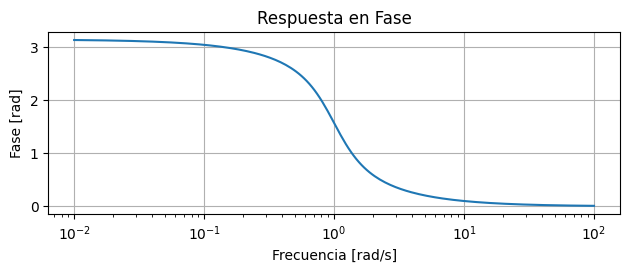

In [38]:
# Gráfico de la respuesta en fase (en radianes)
plt.subplot(2, 1, 2)
plt.semilogx(w, np.deg2rad(phase)) # Conversión de la fase de grados a radianes
plt.title("Respuesta en Fase")
plt.xlabel("Frecuencia [rad/s]")
plt.ylabel("Fase [rad]")
plt.grid(True)

plt.tight_layout() #Ajuste de los margenes
plt.show()

El gráfico concuerda con el de un filtro pasa altos de segundo orden. El comportamiento de la fase se caracteriza por un cambio gradual desde un valor positivo a frecuencias bajas (ω → 0), la fase es positiva al pasar por 0 radianes que es la frecuencia de central, y luego a frecuencias altas (ω → ∞) la fase es negativa.

## Tipo de filtros y ancho de banda

### Clasificación de filtros

Para el análisis de filtros es útil pensar en el comportamiento de los elementos en los casos extremos de la frecuencia $w$. Al analizar los valores límite, es decir, las frecuencias muy bajas (ω → 0) y muy altas (ω → ∞), podemos darnos una idea del funcionamiento del filtro frente al paso de señales en diferentes rangos de frecuencia. 

#### Análisis del Circuito A):

**ω → 0 (Frecuencias Bajas):**  
- El capacitor (C) actúa como un circuito abierto, bloqueando el paso de la señal.  
- El inductor (L) actúa como un cortocircuito, permitiendo que pase corriente.  
- Dado que el capacitor está en serie, bloquea la señal de entrada, resultando en una salida nula (Vo ≈ 0).

**ω → ∞ (Frecuencias Altas):**  
- El capacitor (C) actúa como un cortocircuito, permitiendo el paso de la señal.  
- El inductor (L) actúa como un circuito abierto, bloqueando la señal.  
- Dado que el inductor está en serie, bloquea la señal de entrada, resultando en una salida nula (Vo ≈ 0).

**Conclusión:** : El circuito A atenúa tanto las frecuencias bajas como las altas, permitiendo el paso solo de una banda de frecuencias intermedias. Esto confirma que se trata de un filtro pasa banda, que fue lo que se observo en los distintos gráficos.


#### Análisis del Circuito B):

**ω → 0 (Frecuencias Bajas):**  
- El capacitor (C) actúa como un circuito abierto, bloqueando el paso de la señal hacia la resistencia (R).  
- El inductor (L) actúa como un cortocircuito, desviando la señal a tierra.  
- La señal de salida a través de la resistencia es nula (Vo ≈ 0).

**ω → ∞ (Frecuencias Altas):**  
- El capacitor (C) actúa como un cortocircuito, permitiendo el paso de la señal.  
- El inductor (L) actúa como un circuito abierto, bloqueando la señal.  
- La señal de entrada pasa directamente a través del capacitor y la resistencia.

**Conclusión:** : El circuito B bloquea las frecuencias bajas y permite el paso de las frecuencias altas. Esto confirma que se trata de un filtro pasa altos, lo que también quedo comprobado en las gráficas.

### Calculo de ancho de banda

Para determinar el ancho de banda de ambos filtros, se igualó el módulo de la función de transferencia a -3 dB (lo que corresponde a $\frac{\sqrt{2}}{2} $, dado que se asumió que la frecuencia de resonancia $w_0=2\pi\times1\,\text{Hz}$, lo que implica que la máxima ganancia está en 0 dB.

Una vez realizado este paso, se resolvió la ecuación para encontrar las raíces, ya que estas representan las frecuencias que definen la banda de paso del filtro. Estas frecuencias deben cumplir con las siguientes condiciones:
$$ \omega_0^2 = \omega_1 \cdot \omega_2 $$
El ancho de banda ($\text{BA}$) se calcula como:

$$ \text{BA} = \omega_2 - \omega_1 $$

y también puede expresarse como:

$$ \text{BA} = \frac{\omega_0}{Q} $$

donde $ Q $ es el factor de calidad del filtro.

Dado que no se tienen los valores específicos de los componentes del circuito, el ancho de banda se dejó expresado en función de las frecuencias $\omega_1$ y $\omega_2$, tomando $\omega_0=2\pi\times 1 \, \text{Hz}$ y utilizando los valores de $Q$ correspondientes a cada tipo de filtro.

Para el pasa banda, el ancho de banda es: $\omega_2 - \omega_1 = \left(\frac{\sqrt{1+L^2} - 1}{2L}\right) - \left(\frac{-\sqrt{1+L^2} + 1}{2L}\right)$

Para el pasa alto, el ancho de banda es: $\omega_2 - \omega_1 = \left(\frac{\sqrt{1+(RC)^2} - 1}{2RC}\right) - \left(\frac{-\sqrt{1+(RC)^2} + 1}{2RC}\right)$


In [9]:
from IPython.display import IFrame
IFrame("3. Ancho de banda.pdf", width=1000, height=400)

# Conclusión

Esta tarea me resultó muy útil para comprender el funcionamiento de los filtros desde una perspectiva práctica y visual, complementando el análisis teórico. La metodología propuesta por el docente de analizar el comportamiento de los componentes en los extremos de frecuencia (ω → 0 y ω → ∞) fue sumamente práctica para predecir el tipo de filtro y validar los resultados obtenidos a través de los gráficos.

El estudio de los mapas de polos y ceros, que hasta el momento no conocía, me permitió poder analizar "a simple vista" (aunque aún debo seguir practicando) la estabilidad y la respuesta en frecuencia de los filtros. Entender qué significa la ubicación de los polos, en este caso ambos en el semiplano izquierdo del plano "s", confirmó la estabilidad de ambos filtros, mientras que la presencia de un cero en el origen explicó el comportamiento de la fase en bajas frecuencias (+π/2 radianes). La relación entre la ubicación de los polos y el factor de calidad (Q) ejemplificó lo que vimos en la teoría, ya que la cercanía de los polos al eje imaginario afecta tanto el ancho de banda como la selectividad de los filtros.

Los gráficos de respuesta en magnitud y fase corroboraron mis hipótesis iniciales sobre el tipo de filtro y su comportamiento en función de la frecuencia. La forma de las curvas observadas en la respuesta en magnitud coincidió con las características esperadas para un filtro pasa banda y un filtro pasa altos de segundo orden, y pude ver gráficamente el porqué de sus asíntotas. La respuesta en fase, por su parte, reflejó claramente la influencia de los polos y ceros en el desplazamiento de fase de las señales, mostrando cómo tienen su aporte en la fase total.

Si bien la falta de valores específicos para los componentes impidió calcular el ancho de banda exacto, pude apreciar la relación directa entre el factor de calidad (Q) y el ancho de banda. La fórmula utilizada para expresar el ancho de banda, en función de las frecuencias de corte, también me permitió entender la importancia de este parámetro en el diseño de filtros y cómo impacta en la eficiencia de la señal filtrada.

La realización de esta tarea requirió la consulta de varios recursos, incluyendo el material proporcionado por el profesor (https://pytc2.readthedocs.io/en/latest/notebooks/ejnb_parametrizacion_pasabanda.html), lo discutido en clase junto con el detalle de cómo construir estos gráficos y el análisis correspondiente, y la asistencia de una IA para la generación de código y la comprensión de conceptos específicos que no recordaba. La capacidad de la IA para generar código fue necesaria para superar las dificultades técnicas encontradas durante el desarrollo del trabajo, ya que en el notebook proporcionado por el profesor se usaban modulos con los que no estaba familiarizada. Por lo tanto, recurri a la ayuda a la IA para que me guiara con funciones análogas y así pudiera continuar con el análisis.

Esta tarea permitió afianzar y aumentar mis conocimientos teóricos sobre filtros, al mismo tiempo que desarrollé habilidades prácticas para analizar y comprender su funcionamiento a través de herramientas visuales y analíticas. Familiarizarme representaciones visuales me brindarán una idea rápida y clara de las características del filtro, facilitando mi comprensión sin entrar en cálculos complejos.